<a href="https://colab.research.google.com/github/siddharthpurswani/Flipkart_Customer_Satisfaction_Classification/blob/main/Flipkart_Customer_Satisfaction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Flipkart aims to enhance customer satisfaction in a highly competitive e-commerce environment by analyzing customer interactions, feedback, and satisfaction scores across its support channels. The goal is to identify key drivers of satisfaction and improve service strategies to boost CSAT scores, agent performance, and overall customer retention.

# Business Context

In the highly competitive e-commerce space, delivering excellent customer service is crucial for sustaining growth and customer loyalty. Flipkart, as one of the largest e-commerce platforms, focuses on enhancing customer satisfaction to differentiate itself from competitors. The dataset in this project captures customer interactions, feedback, and satisfaction scores across various support channels at Flipkart. By analyzing these interactions, the goal is to identify key drivers of customer satisfaction, understand performance across different customer service teams, and develop strategies to improve the overall service experience.

Understanding factors that influence customer satisfaction will allow Flipkart to not only resolve customer issues faster but also tailor its support strategies to meet diverse customer expectations. This will help in optimizing the performance of service agents and improving satisfaction metrics like the CSAT score, ultimately leading to increased brand loyalty and customer retention.

# Understanding the data

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1x7d15ghKCjLnOmu9VRnOxQ_ruCi4kyJDPRAmB0DZR-0/export?format=csv')

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.shape

(85907, 20)

In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28739 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
df['CSAT Score'].unique()

array([5, 4, 1, 3, 2])

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


# Data Cleaning

In [ ]:
#dropping duplicate values
df.drop_duplicates(inplace= True)

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28739 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
#drop unnecessary columns
df.drop(['Customer Remarks','Order_id','order_date_time','connected_handling_time'],axis = 1, inplace = True)

Fill null values

In [ ]:
df['Customer_City'].fillna('Unknown', inplace = True)

In [ ]:
df['Product_category'].fillna('Unknown', inplace = True)

In [ ]:
df['Tenure Bucket'].unique()

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [ ]:
df[df['CSAT Score'] == 1]

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
11,4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Order Related,Delayed,02/08/2023 10:44,02/08/2023 11:14,02-Aug-23,NAGPUR,LifeStyle,434.0,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1
25,c0edcb0a-cfa8-4f35-86ad-88c9f6b47290,Inbound,Order Related,Order status enquiry,02/08/2023 11:07,02/08/2023 11:10,02-Aug-23,NEW DELHI,Mobile,99999.0,Michelle Williams,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,1
31,39fb5940-dffe-49bf-8f9b-936cb1994152,Inbound,Order Related,Unable to track,01/08/2023 21:28,01/08/2023 22:20,01-Aug-23,Unknown,Unknown,NaN,Ashley Hamilton,Jackson Park,William Kim,On Job Training,Evening,1
32,b18b603b-2f31-49e5-8e68-64010c1c5674,Outcall,Returns,Reverse Pickup Enquiry,02/08/2023 11:09,02/08/2023 15:05,02-Aug-23,Unknown,Unknown,NaN,Rhonda Martin DVM,Wyatt Kim,Jennifer Nguyen,On Job Training,Morning,1
54,2ad4e1cb-60e8-4a0f-91aa-c253c185ba26,Inbound,Returns,Reverse Pickup Enquiry,30/07/2023 13:15,02/08/2023 07:42,02-Aug-23,JHUJHUNU,LifeStyle,799.0,Colleen Morton,Zoe Yamamoto,John Smith,>90,Afternoon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85873,d349f69a-8698-4756-bc13-72f86cc3f3b8,Inbound,Order Related,Order status enquiry,31/08/2023 15:02,31/08/2023 15:03,31-Aug-23,Unknown,Unknown,NaN,James Tran,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,1
85876,f6848303-58d5-4641-a1db-756bb844b491,Inbound,Returns,Reverse Pickup Enquiry,31/08/2023 14:46,31/08/2023 14:49,31-Aug-23,Unknown,Unknown,NaN,Timothy Green,Mia Patel,William Kim,On Job Training,Evening,1
85882,fa7f7e0a-6ede-4814-be7e-d0974b3c844a,Inbound,Returns,Reverse Pickup Enquiry,31/08/2023 19:51,31/08/2023 19:54,31-Aug-23,Unknown,Unknown,NaN,Daniel Ball,Ethan Nakamura,Olivia Tan,>90,Morning,1
85887,4b666b79-a622-4e88-b284-bbb7e5d887cf,Inbound,Returns,Reverse Pickup Enquiry,31/08/2023 22:12,31/08/2023 22:20,31-Aug-23,Unknown,Unknown,NaN,Robert Lara,Brayden Wong,John Smith,31-60,Evening,1


Change of data type to datetime

In [ ]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True)

In [ ]:
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

In [ ]:
#necessary column add
df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Unknown,Unknown,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Unknown,Unknown,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Unknown,Unknown,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Unknown,Unknown,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Unknown,Unknown,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


# Data Visualization

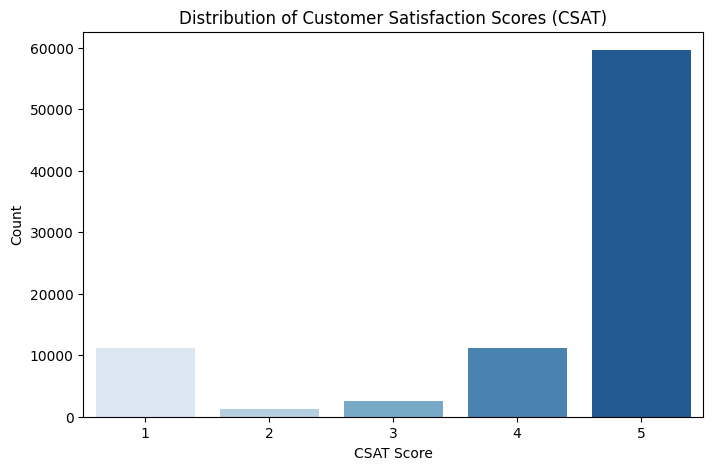

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='CSAT Score', palette='Blues')
plt.title("Distribution of Customer Satisfaction Scores (CSAT)")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

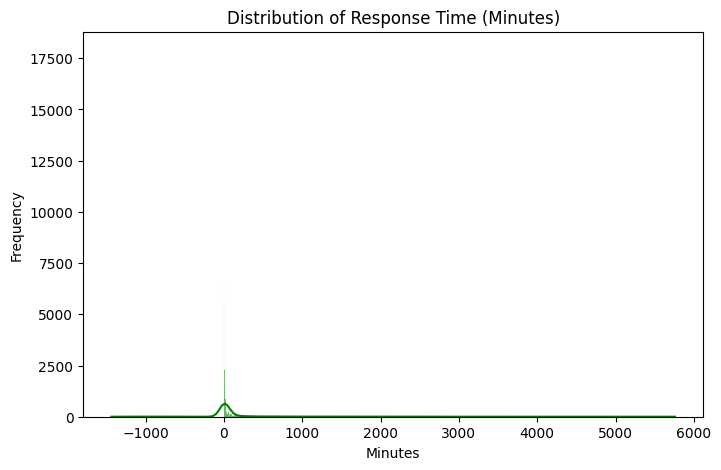

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['response_time_minutes'], kde=True, color='green')
plt.title("Distribution of Response Time (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

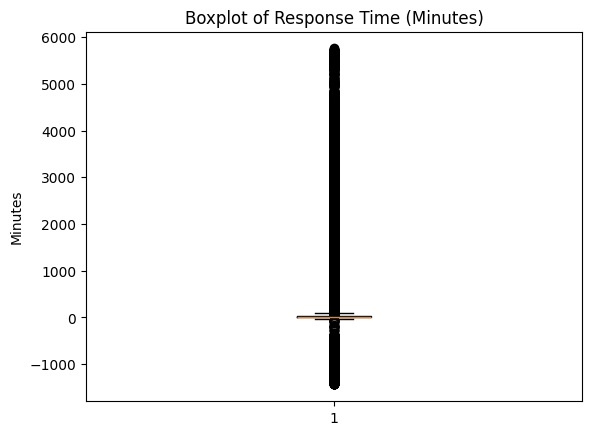

In [ ]:
plt.boxplot(df['response_time_minutes'])
plt.title("Boxplot of Response Time (Minutes)")
plt.ylabel("Minutes")
plt

In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Customer_City', 'Product_category', 'Item_price', 'Agent_name',
       'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'response_time_minutes'],
      dtype='object')

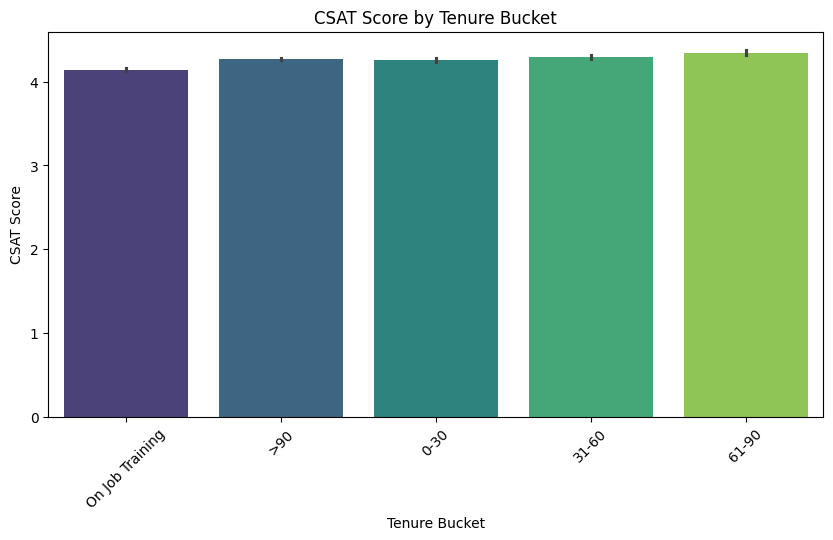

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Tenure Bucket', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()

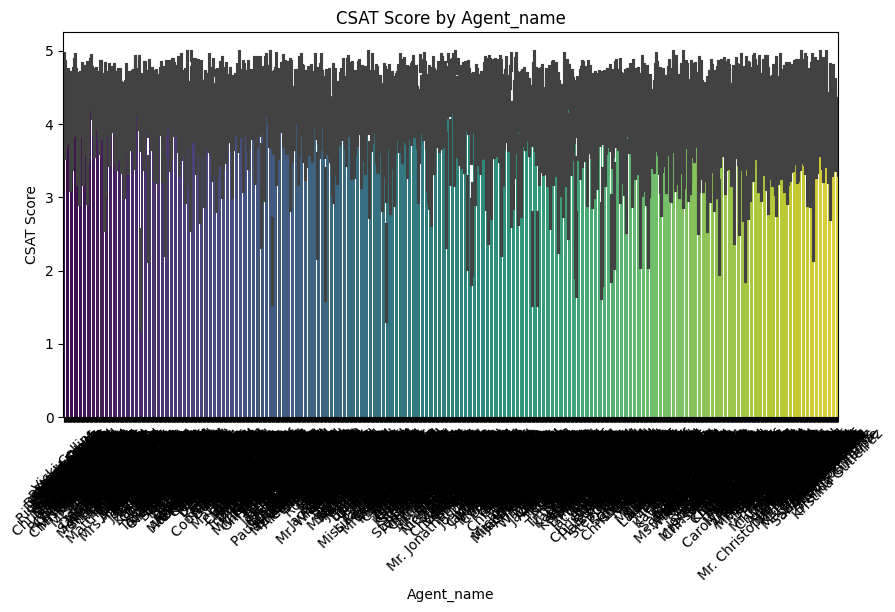

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Agent_name', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by Agent_name")
plt.xlabel("Agent_name")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Agent_name'].nunique()

1371

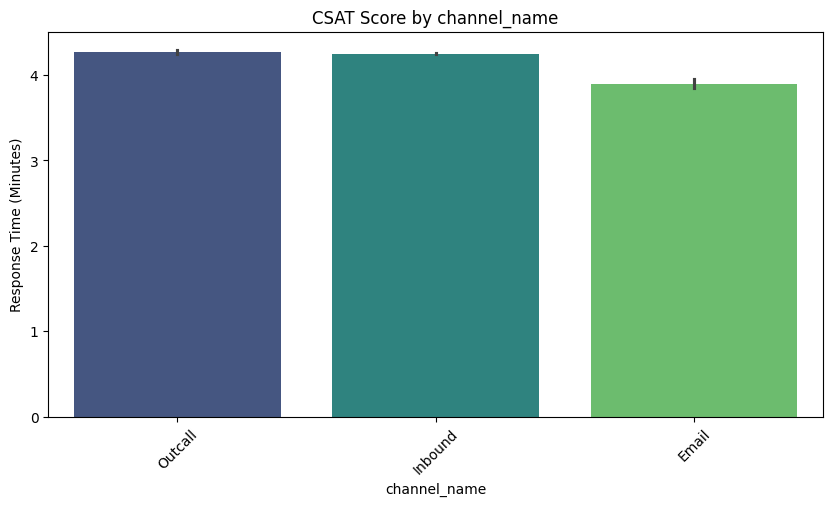

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='channel_name', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by channel_name")
plt.xlabel("channel_name")
plt.ylabel("Response Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

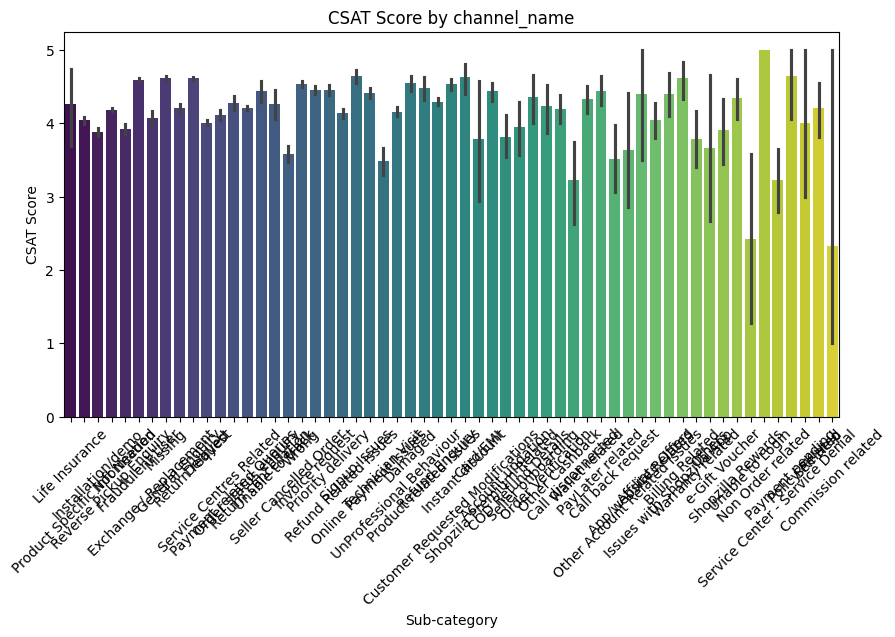

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Sub-category', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by channel_name")
plt.xlabel("Sub-category")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Sub-category'].nunique()

57

In [ ]:
df['Product_category'].unique()

array(['Unknown', 'LifeStyle', 'Electronics', 'Mobile', 'Home Appliences',
       'Furniture', 'Home', 'Books & General merchandise', 'GiftCard',
       'Affiliates'], dtype=object)

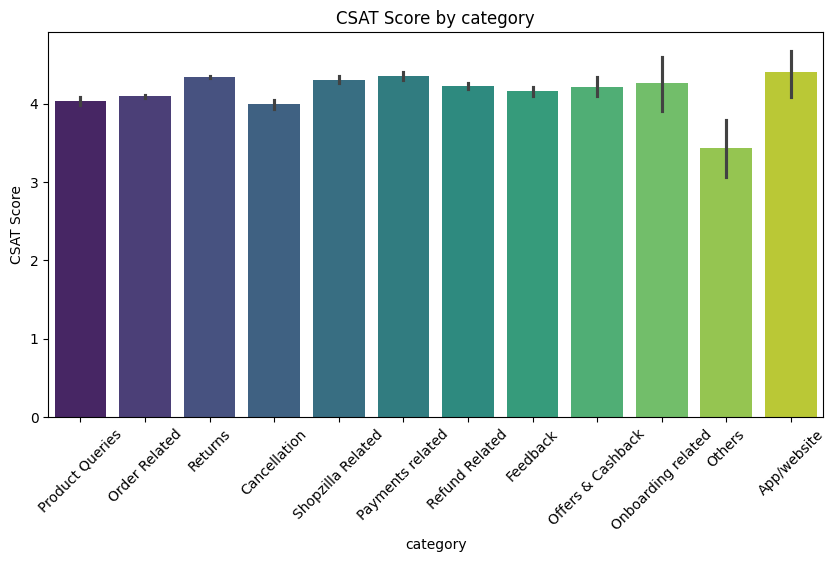

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='category', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by category")
plt.xlabel("category")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()

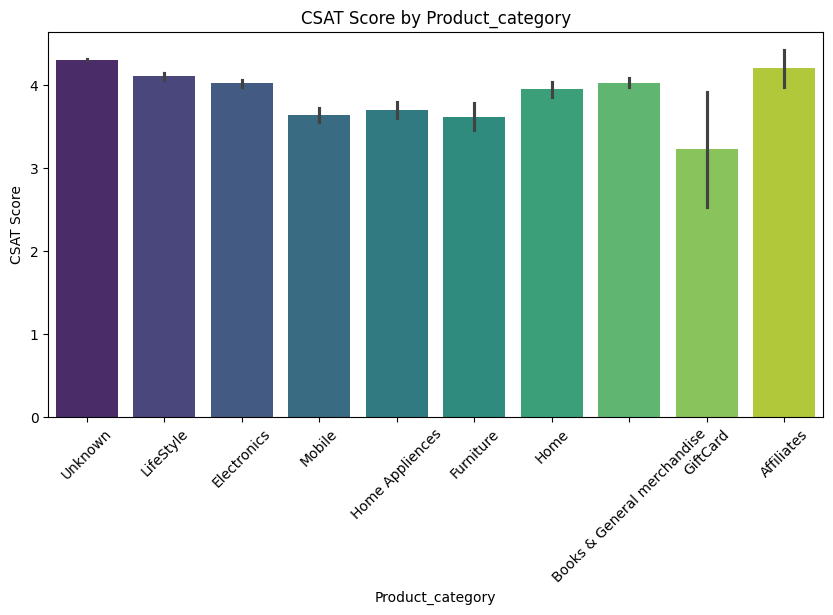

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Product_category', y='CSAT Score', palette='viridis')
plt.title("CSAT Score by Product_category")
plt.xlabel("Product_category")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()

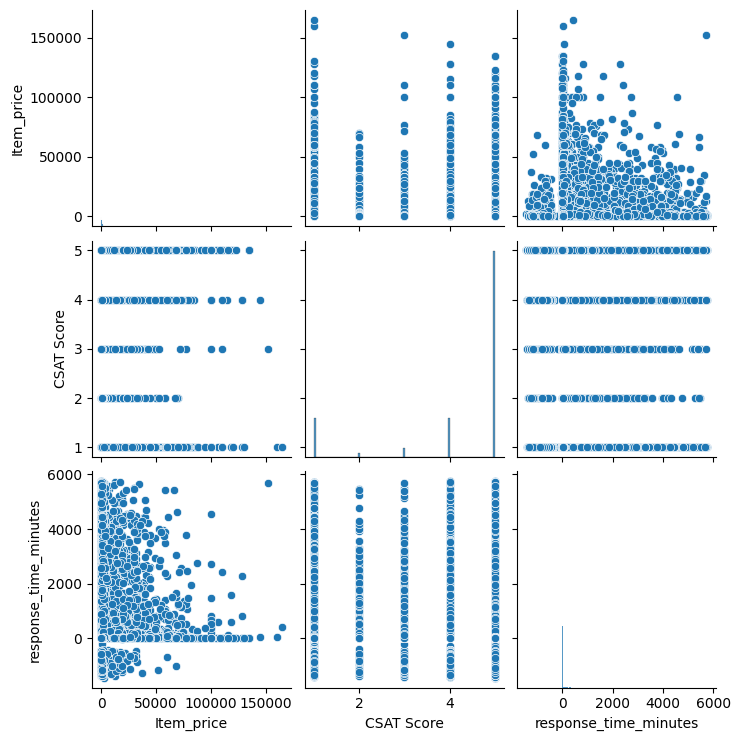

In [ ]:
sns.pairplot(df)
#

<Axes: >

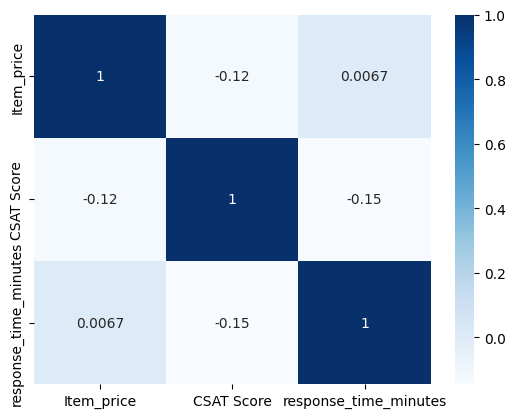

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

# Feature Engineering and Data Wrangling

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Unknown,Unknown,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Unknown,Unknown,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Unknown,Unknown,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Unknown,Unknown,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Unknown,Unknown,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


In [ ]:
df[df['response_time_minutes'] < 0 ]

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
74172,8a3b660a-3a3d-4761-8ccc-553c7e82c592,Inbound,Refund Related,COD Refund Details,2023-08-28 16:07:00,2023-08-28,28-Aug-23,BHAGALPUR,LifeStyle,323.0,Steven Wall,Zoe Yamamoto,Emily Chen,>90,Afternoon,5,-967.0
74173,4f1e4d87-44f8-4a6e-9952-385e27ccc4ae,Outcall,Returns,Reverse Pickup Enquiry,2023-08-28 16:56:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Brittney Key,Mia Yamamoto,Jennifer Nguyen,On Job Training,Morning,3,-1016.0
74174,b8f28222-bf9d-4509-9b2b-6e36d10c9e87,Inbound,Payments related,Online Payment Issues,2023-08-28 20:14:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Brian Koch,Ethan Tan,Jennifer Nguyen,On Job Training,Evening,5,-1214.0
74175,6405d511-6679-4cf6-a243-ff4ea7e303d9,Inbound,Payments related,Billing Related,2023-08-28 14:37:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Ronnie Romero,Aiden Patel,John Smith,>90,Morning,5,-877.0
74176,5b424642-5c4c-42d9-8dc9-750413cc2777,Inbound,Returns,Return request,2023-08-28 23:26:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Ann English,Olivia Suzuki,Olivia Tan,On Job Training,Morning,5,-1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77566,7bac7fcd-8ae1-46c0-9315-dc42325e5102,Outcall,Payments related,Payment pending,2023-08-28 13:25:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Tammy Gould,Ava Wong,Jennifer Nguyen,On Job Training,Morning,5,-805.0
77567,95d5fa75-b04a-4da1-96c9-1bdfcedf107e,Outcall,Returns,Return request,2023-08-28 18:09:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Cathy Harris,Charlotte Suzuki,William Kim,On Job Training,Morning,5,-1089.0
77568,771dace8-342b-4551-ba27-ea21befe67fc,Outcall,Returns,Reverse Pickup Enquiry,2023-08-28 22:20:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Jessica Cook,Ethan Tan,Michael Lee,>90,Evening,4,-1340.0
77569,ccc21c3e-97a9-41e9-89f2-65a5c7e609d8,Inbound,Order Related,Order status enquiry,2023-08-28 14:38:00,2023-08-28,28-Aug-23,Unknown,Unknown,NaN,Madison Flores,Ethan Tan,Jennifer Nguyen,On Job Training,Evening,1,-878.0


Same day response time were showing up in negative as time was not given in that, so just made the response time for all those as 100

In [ ]:
df['response_time_minutes'] = df['response_time_minutes'].apply(lambda x: 100 if x < 0 else x)

In [ ]:
df[df['response_time_minutes'] > 2880 ]


,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
54,2ad4e1cb-60e8-4a0f-91aa-c253c185ba26,Inbound,Returns,Reverse Pickup Enquiry,2023-07-30 13:15:00,2023-08-02 07:42:00,02-Aug-23,JHUJHUNU,LifeStyle,799.0,Colleen Morton,Zoe Yamamoto,John Smith,>90,Afternoon,1,3987.0
92,ce7c55f1-8072-4f96-ae67-69d2d84be187,Inbound,Returns,Reverse Pickup Enquiry,2023-07-29 18:37:00,2023-08-01 12:54:00,01-Aug-23,GAYA,Books & General merchandise,295.0,Matthew Bennett,Olivia Wang,John Smith,>90,Evening,5,3977.0
224,9ff8b39b-bbaa-4d4a-adcd-bdf39804c37d,Inbound,Returns,Reverse Pickup Enquiry,2023-07-30 11:30:00,2023-08-02 07:12:00,02-Aug-23,BELLARY,Books & General merchandise,928.0,Tamara Washington,Elijah Yamaguchi,John Smith,>90,Evening,4,4062.0
355,933abc76-8058-4561-8dc8-087ae1153458,Inbound,Returns,Reverse Pickup Enquiry,2023-07-29 15:59:00,2023-08-01 08:25:00,01-Aug-23,KATIHAR,LifeStyle,199.0,Rachel Smith,Alexander Tanaka,Michael Lee,0-30,Evening,3,3866.0
474,034aa02e-824e-4def-b576-57a2f277fce1,Inbound,Returns,Fraudulent User,2023-07-29 20:06:00,2023-08-01 14:05:00,01-Aug-23,CHATRAPUR,Books & General merchandise,1240.0,Michelle Christensen,Nathan Patel,Michael Lee,>90,Afternoon,4,3959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85615,a6a974c2-e585-4268-a750-e64c28f1a683,Inbound,Order Related,Installation/demo,2023-08-29 07:57:00,2023-08-31 13:17:00,31-Aug-23,UDHAMPUR,Home Appliences,12999.0,Dylan Stevens,Emma Park,Jennifer Nguyen,On Job Training,Evening,5,3200.0
85617,10f511f7-6233-4744-a8ae-f0424c42f6b1,Inbound,Order Related,Order status enquiry,2023-08-28 08:10:00,2023-08-31 18:28:00,31-Aug-23,SIKAR,Books & General merchandise,190.0,Elijah Hoffman,Carter Park,Jennifer Nguyen,On Job Training,Morning,5,4938.0
85721,616690ed-d2c2-4949-8ac6-7dcdf67049ff,Inbound,Returns,Reverse Pickup Enquiry,2023-08-28 20:01:00,2023-08-31 17:27:00,31-Aug-23,AURANGABAD,Electronics,999.0,Jennifer Cline,Logan Lee,Jennifer Nguyen,On Job Training,Evening,5,4166.0
85728,7b536f21-cf47-4aba-9c49-e53c1fbd308f,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 13:24:00,2023-08-31 10:28:00,31-Aug-23,NAGPUR,LifeStyle,813.0,Guy Duncan,Carter Park,Jennifer Nguyen,On Job Training,Morning,5,5584.0


When response time was more than 2 days it was result to decrease in mean value of CSAT Score. Made all the outliers to 2880 to make distribution as normal as possible

In [ ]:
df['response_time_minutes'] = df['response_time_minutes'].apply(lambda x: 2880 if x > 2880 else x)

In [ ]:
df['response_time_minutes'].describe()

,response_time_minutes
count,85907.000000
mean,160.841212
std,467.797460
min,0.000000
25%,2.000000
50%,6.000000
75%,58.000000
max,2880.000000


In [ ]:
#uncessary columns dropped
df.drop(['Issue_reported at','issue_responded','Item_price','Survey_response_Date'], axis = 1, inplace = True)

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Unknown,Unknown,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Unknown,Unknown,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Unknown,Unknown,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Unknown,Unknown,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Unknown,Unknown,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


Encoding for necessary features

In [ ]:
csat_means = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False)

low_csat_agents = csat_means < 3
low_csat_agents_list = csat_means[low_csat_agents].index.tolist()

mid_csat_agents = (csat_means >= 3) & (csat_means <= 4.3)
mid_csat_agents_list = csat_means[mid_csat_agents].index.tolist()

high_csat_agents = csat_means > 4.3
high_csat_agents_list = csat_means[high_csat_agents].index.tolist()

In [ ]:
def categorize_agent(agent_name):
    if agent_name in low_csat_agents_list:
        return 1
    elif agent_name in mid_csat_agents_list:
        return 2
    elif agent_name in high_csat_agents_list:
        return 3
    else:
        return 0

In [ ]:
df['Agent_name_encoding'] = df['Agent_name'].apply(categorize_agent)

In [ ]:
sc_dummies = pd.get_dummies(df['Sub-category'], prefix='Sub-category', drop_first= True)

In [ ]:
new_df = df.drop(['Unique id','channel_name','Customer_City','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift','category','Product_category'], axis = 1)

In [ ]:
df_merged = pd.concat([new_df, sc_dummies], axis=1)

In [ ]:
df_merged

,Sub-category,CSAT Score,response_time_minutes,Agent_name_encoding,Sub-category_Affiliate Offers,Sub-category_App/website Related,Sub-category_Billing Related,Sub-category_COD Refund Details,Sub-category_Call back request,Sub-category_Call disconnected,...,Sub-category_Shopzilla Rewards,Sub-category_Signup Issues,Sub-category_Technician Visit,Sub-category_UnProfessional Behaviour,Sub-category_Unable to Login,Sub-category_Unable to track,Sub-category_Wallet related,Sub-category_Warranty related,Sub-category_Wrong,Sub-category_e-Gift Voucher
0,Life Insurance,5,34.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Product Specific Information,5,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Installation/demo,5,22.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Reverse Pickup Enquiry,5,20.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Not Needed,5,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Refund Enquiry,4,482.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85903,Seller Cancelled Order,5,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85904,Order status enquiry,5,5.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85905,UnProfessional Behaviour,4,1.0,2,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
cols_to_scale = ['response_time_minutes','Agent_name_encoding']

Normalization to make the feature values between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_merged[cols_to_scale])

In [ ]:
df_scaled = pd.DataFrame(scaled,
                         columns=[col + '_scaled' for col in cols_to_scale],
                         index=df.index)

df = pd.concat([df_merged, df_scaled], axis=1)

In [ ]:
df.drop(['response_time_minutes','Agent_name_encoding','Sub-category'], axis = 1, inplace = True)

# Model Building and Evaluation

  Split X and Y

In [ ]:
Y = df['CSAT Score']
X = df.drop('CSAT Score', axis = 1)

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    shuffle=True, stratify = Y
)

Model evaluation for multiclass

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',   # softmax multiclass
    solver='lbfgs',              # works well for multinomial
    max_iter=1000                # increase for convergence
)

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.6960772901874054

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.06      0.11      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.70      0.99      0.82     11924

    accuracy                           0.70     17182
   macro avg       0.24      0.21      0.19     17182
weighted avg       0.55      0.70      0.58     17182


Confusion Matrix:
 [[  135     0     0     0  2111]
 [    8     0     0     0   248]
 [    8     0     0     0   504]
 [   19     0     0     0  2225]
 [   99     0     0     0 11825]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',     # or "entropy"
    max_depth=12,       # you can tune this
    random_state=42
)

dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.6924106623210337

Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.09      0.14      2246
           2       0.00      0.00      0.00       256
           3       0.07      0.00      0.00       512
           4       0.08      0.00      0.01      2244
           5       0.70      0.98      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.26      0.21      0.19     17182
weighted avg       0.56      0.69      0.59     17182


Confusion Matrix:
 [[  195     5     6    16  2024]
 [   12     0     1     3   240]
 [   22     0     1     5   484]
 [   43     1     0     6  2194]
 [  179     2     7    41 11695]]


In [ ]:
df.head()

,CSAT Score,Sub-category_Affiliate Offers,Sub-category_App/website Related,Sub-category_Billing Related,Sub-category_COD Refund Details,Sub-category_Call back request,Sub-category_Call disconnected,Sub-category_Card/EMI,Sub-category_Commission related,Sub-category_Customer Requested Modifications,...,Sub-category_Technician Visit,Sub-category_UnProfessional Behaviour,Sub-category_Unable to Login,Sub-category_Unable to track,Sub-category_Wallet related,Sub-category_Warranty related,Sub-category_Wrong,Sub-category_e-Gift Voucher,response_time_minutes_scaled,Agent_name_encoding_scaled
0,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.011806,0.5
1,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000694,1.0
2,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.007639,1.0
3,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.006944,0.5
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000694,0.5


# Binary classification and feature engineering for target variable

In [ ]:
df['CSAT Score_']=df['CSAT Score'].apply(lambda x: 0 if x <= 3 else 1)

In [ ]:
df.drop('CSAT Score',axis = 1, inplace = True)

In [ ]:
df[['response_time_minutes_scaled','Agent_name_encoding_scaled']]

,response_time_minutes_scaled,Agent_name_encoding_scaled
0,0.011806,0.5
1,0.000694,1.0
2,0.007639,1.0
3,0.006944,0.5
4,0.000694,0.5
...,...,...
85902,0.167361,0.5
85903,0.000694,1.0
85904,0.001736,0.5
85905,0.000347,0.5


In [ ]:
X = df.drop(['CSAT Score_'],axis = 1)
Y = df['CSAT Score_']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size= 0.8, random_state= 42,  stratify = Y)

In [ ]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.4 MB/s eta 0:00:00


## Oversampling as the target variable is highly imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={0: 50000})
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [ ]:
y_proba = clf.predict_proba(X_test)
y_proba_pos = y_proba[:, 1]
threshold = 0.55
y_pred_custom = (y_proba_pos >= threshold).astype(int)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_custom))

Accuracy: 0.6283901757653358

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.71      0.40      3014
           1       0.91      0.61      0.73     14168

    accuracy                           0.63     17182
   macro avg       0.59      0.66      0.57     17182
weighted avg       0.80      0.63      0.67     17182


Confusion Matrix:
 [[2135  879]
 [5506 8662]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='entropy',     # or "entropy"
    max_depth=10,min_samples_split= 3, min_samples_leaf= 3,      # you can tune this
    random_state=42
)

dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=3, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.699220114072867

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.59      0.41      3014
           1       0.89      0.72      0.80     14168

    accuracy                           0.70     17182
   macro avg       0.60      0.66      0.60     17182
weighted avg       0.79      0.70      0.73     17182


Confusion Matrix:
 [[ 1789  1225]
 [ 3943 10225]]


In [ ]:
comparison = pd.DataFrame({
    'feature': X_train.columns,
    'log_coef': clf.coef_[0],
    'dt_importance': dt.feature_importances_
}).sort_values('dt_importance', ascending=False)

print(comparison)

                                          feature  log_coef  dt_importance
56                   response_time_minutes_scaled -1.946509       0.470452
57                     Agent_name_encoding_scaled  1.806525       0.350744
38                    Sub-category_Return request  1.025806       0.077979
12                   Sub-category_Fraudulent User  0.997299       0.045150
19                           Sub-category_Missing  1.007638       0.022436
54                             Sub-category_Wrong  0.782893       0.013046
41            Sub-category_Seller Cancelled Order -0.715630       0.005046
14                 Sub-category_Installation/demo -0.470107       0.004059
39            Sub-category_Reverse Pickup Enquiry  0.038162       0.003311
10                           Sub-category_Delayed -0.166164       0.002261
30           Sub-category_Payment related Queries  0.261859       0.001862
13                   Sub-category_General Enquiry  0.043819       0.001262
22             Sub-catego

In [ ]:
y_proba_lr = clf.predict_proba(X_test)[:, 1]
y_proba_dt = dt.predict_proba(X_test)[:, 1]


fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_proba_lr)
auc_lr = roc_auc_score(Y_test, y_proba_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_proba_dt)
auc_dt = roc_auc_score(Y_test, y_proba_dt)

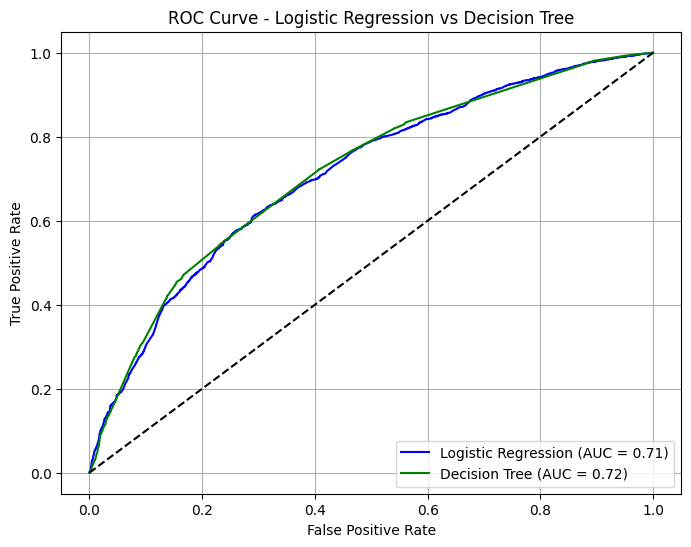

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression vs Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Conclusion and Insights – Flipkart CSAT Analysis

For the goal of identifying key drivers of customer satisfaction and improving service strategies, we evaluated models to predict bad CSAT (customer dissatisfaction). Our analysis yielded the following key points:

Model Selection:

Logistic Regression was selected as the primary model because it achieved higher recall (0.71) for bad CSAT compared to Decision Tree (recall 0.59).

High recall was prioritized since our objective is to identify as many dissatisfied customers as possible, allowing us to analyze the underlying causes of bad CSAT.

Trade-offs:

While Logistic Regression provides higher recall, precision for bad CSAT is low (0.28). This means a significant number of predicted bad CSATs may actually be satisfied customers.

This trade-off is acceptable for our use case, as our focus is on understanding drivers of dissatisfaction, rather than perfectly classifying every individual case.

Key Insights:

Logistic Regression allows interpretability of feature coefficients, helping us identify factors strongly associated with bad CSAT (e.g., delayed deliveries, customer-agent interactions, product quality issues).

These insights provide actionable information to improve agent performance, refine service strategies, and ultimately boost overall CSAT and retention.

Future Improvements:

To improve precision without sacrificing too much recall, we can explore:

Threshold tuning using predicted probabilities.

Ensemble methods such as Random Forest or Gradient Boosting.

Additionally, visualizing feature importance and running precision-recall curves will further aid in understanding the trade-offs and optimizing interventions.